## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
from tensorflow import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation,Dropout
from keras.regularizers import l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], 
              use_bn=True,drp_ratio=0.,l2_ratio=0.):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   kernel_regularizer=l2(l2_ratio),
                                   name="hidden_layer"+str(i+1))(input_layer)
            if use_bn:
                x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Dropout(drp_ratio)(x)
            
        else:
            x = keras.layers.Dense(units=n_units,
                                   kernel_regularizer=l2(l2_ratio),
                                   name="hidden_layer"+str(i+1))(x)
            if use_bn:
                x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Dropout(drp_ratio)(x)
                
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 3
BATCH_SIZE = 128

"""
建立實驗組合
"""
USE_BN = [True, False]
DRP_RATIO = [0., 0.4, 0.8]
L2_RATIO = [0., 1e-6, 1e-8]

In [7]:
import keras.backend as k

results = {}
for i,(use_bn,drp_ratio,l2_ratio) in enumerate(itertools.product(USE_BN,DRP_RATIO,L2_RATIO)):
    print("exp:%i,bn:%s,drp:%.2f,l2:%.2f" % (i, use_bn, drp_ratio, l2_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], use_bn=use_bn,drp_ratio=drp_ratio,l2_ratio=l2_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              verbose=0,
              shuffle=True)
    
    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

exp:0,bn:True,drp:0.00,l2:0.00
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.math.multiply (TFOpLambda (None, 512)               0         
_________________________________________________________________
tf.__operators__.add (TFOpLa (None, 512)               0         
_________________________________________________________________
tf.nn.relu (TFOpLambda)      (None, 512)               0         
_________________________________________________________________
tf.identity (TFOpLambda)     (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (

C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


exp:1,bn:True,drp:0.00,l2:0.00
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.math.multiply_3 (TFOpLamb (None, 512)               0         
_________________________________________________________________
tf.__operators__.add_3 (TFOp (None, 512)               0         
_________________________________________________________________
tf.nn.relu_3 (TFOpLambda)    (None, 512)               0         
_________________________________________________________________
tf.identity_3 (TFOpLambda)   (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)       

exp:5,bn:True,drp:0.40,l2:0.00
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.math.multiply_15 (TFOpLam (None, 512)               0         
_________________________________________________________________
tf.__operators__.add_15 (TFO (None, 512)               0         
_________________________________________________________________
tf.nn.relu_15 (TFOpLambda)   (None, 512)               0         
_________________________________________________________________
tf.identity_15 (TFOpLambda)  (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)       

exp:9,bn:False,drp:0.00,l2:0.00
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.nn.relu_27 (TFOpLambda)   (None, 512)               0         
_________________________________________________________________
tf.identity_27 (TFOpLambda)  (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
tf.nn.relu_28 (TFOpLambda)   (None, 256)               0         
_________________________________________________________________
tf.identity_28 (TFOpLambda)

exp:14,bn:False,drp:0.40,l2:0.00
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
tf.nn.relu_42 (TFOpLambda)   (None, 512)               0         
_________________________________________________________________
tf.identity_42 (TFOpLambda)  (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
tf.nn.relu_43 (TFOpLambda)   (None, 256)               0         
_________________________________________________________________
tf.identity_43 (TFOpLambd

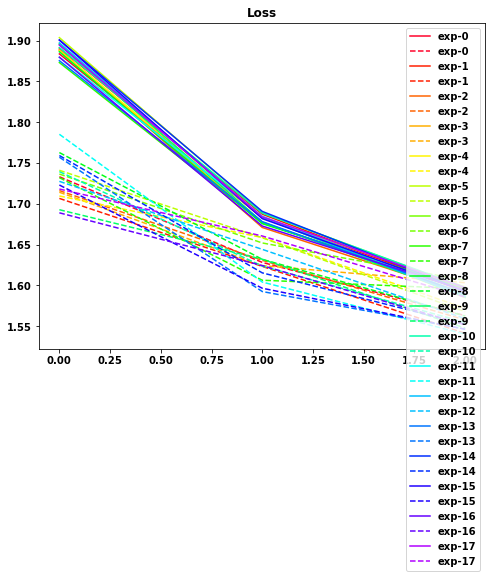

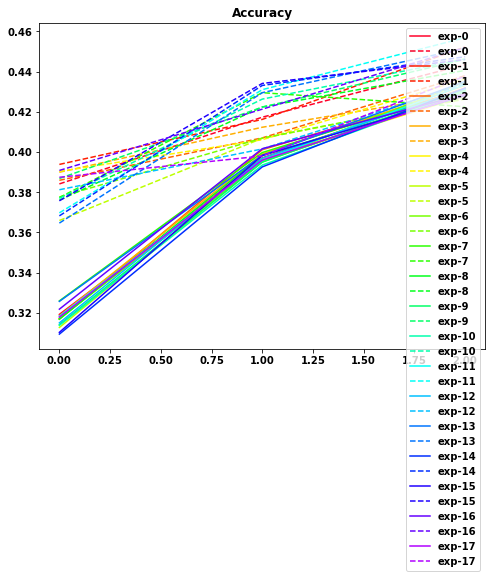

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()